# Testing HW equilibrium


In [ ]:
library(data.table)
library(lfa)
library(ggplot2)



## Generation 0 (baseline)

In [ ]:
# read data
dat = fread("..//models/BMI-SNP/output/agents-0-0.csv")
dat = dat[generation == 0]
dim(dat$generation)


In [7]:
# process snps
vars = paste0("snp", 1:100)
dat[, (vars) := tstrsplit(snps, ",", fixed=TRUE), id]
dat[, (vars) := lapply(.SD, function(x) as.numeric(gsub(".+=|\\}", "", x))), .SDcols = vars]
m = as.matrix(transpose(dat[, .SD, .SDcols = names(dat) %like% "snp[0-9]+"]))


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.2735  0.5155  0.5102  0.7398  0.9970 

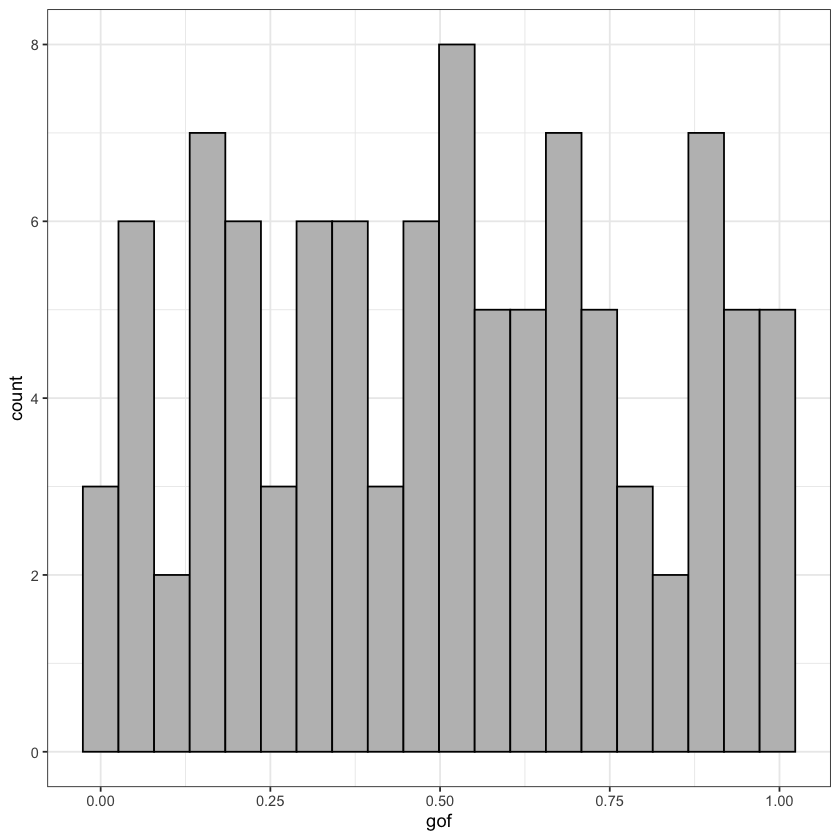

In [9]:
# using 1 for standard HW test
LF = lfa(tdat, 1)
gof = sHWE(tdat, LF, 10)
summary(gof)
ggplot() + aes(gof)+ geom_histogram(bins = 20, fill="grey", colour="black") + theme_bw()
